In [4]:
import pandas as pd
import ast
import colorsys

# Load the dataset
file_path = "fixed_filtered_char_color.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)
df = df.drop(columns=["Unnamed: 0"])

# Function to process colors
def process_colors(color_str):
    try:
        # Convert string to list of lists (RGB values)
        color_list = ast.literal_eval(color_str)
        
        hue_list = []
        sat_list = []
        luminance_list = []

        # Compute Hue, Saturation, and Luminance
        for color in color_list:
            r, g, b = [x / 255.0 for x in color]  # Normalize RGB
            h, s, v = colorsys.rgb_to_hsv(r, g, b)
            luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b  # Perceived brightness

            hue_list.append(h * 360)
            sat_list.append(s * 100)
            luminance_list.append(luminance)

        # Compute normalized contrast level
        max_lum, min_lum = max(luminance_list), min(luminance_list)
        contrast_levels = [(lum - min_lum) / (max_lum - min_lum) for lum in luminance_list]

        # Compute averages
        avg_hue = round(sum(hue_list) / len(hue_list), 2)
        avg_saturation = round(sum(sat_list) / len(sat_list), 2)
        avg_contrast_level = round(sum(contrast_levels) / len(contrast_levels), 3)

        return avg_hue, avg_saturation, avg_contrast_level
    except:
        return None, None, None

# Apply the function to each row
df[["Hue", "Saturation", "Contrast Level"]] = df["colors"].apply(lambda x: pd.Series(process_colors(x)))

# Save the processed dataset
# processed_file_path = "processed_color_dataset.csv"
# df.to_csv(processed_file_path, index=False)

# # Display sample output
# print(df[["char_name", "Hue", "Saturation", "Contrast Level"]].head())

df.head()

jp_title                      char_name  \
0                                   Horimiya         Izumi Miyamura (宮村 伊澄)   
1                                   Horimiya             Kyouko Hori (堀 京子)   
2   Mushoku Tensei: Isekai Ittara Honki Dasu  Rudeus Greyrat (ルーデウス・グレイラット)   
3                      Dr. Stone: Stone Wars        Senkuu Ishigami (石神 千空)   
4  Tensei shitara Slime Datta Ken 2nd Season     Rimuru Tempest (リムル＝テンペスト)   

     fav                                                img  \
0  16137  https://cdn.myanimelist.net/images/characters/...   
1  12528  https://cdn.myanimelist.net/images/characters/...   
2  10221  https://cdn.myanimelist.net/images/characters/...   
3  22824  https://cdn.myanimelist.net/images/characters/...   
4  23554  https://cdn.myanimelist.net/images/characters/...   

                                              colors     Hue  Saturation  \
0  [[194, 222, 249], [185, 220, 250], [177, 200, ...  210.87       23.23   
1  [[220, 237, 253], [208, 227, 250], [192, 203, ...  209.00       31.54   
2  [[221, 234, 246], [179, 215, 251], [140, 207, ...  216.15       28.99   
3  [[213, 231, 245], [203, 219, 236], [188, 205, ...  208.66       34.53   
4  [[219, 232, 248], [178, 209, 229], [145, 164, ...   86.75       36.31   

   Contrast Level  
0           0.496  
1           0.463  
2           0.444  
3           0.503  
4           0.535

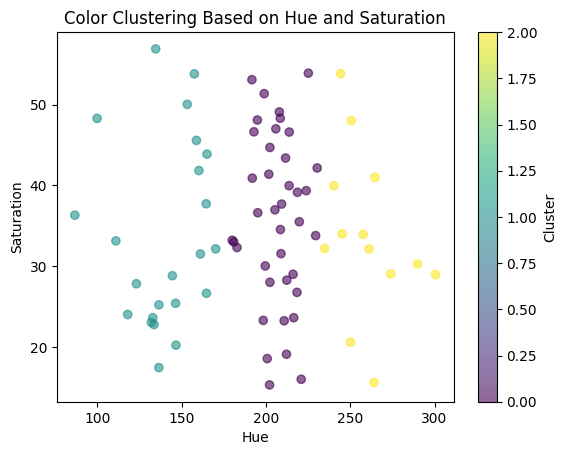

                       char_name     Hue  Saturation  Contrast Level  Cluster
0         Izumi Miyamura (宮村 伊澄)  210.87       23.23           0.496        0
1             Kyouko Hori (堀 京子)  209.00       31.54           0.463        0
2  Rudeus Greyrat (ルーデウス・グレイラット)  216.15       28.99           0.444        0
3        Senkuu Ishigami (石神 千空)  208.66       34.53           0.503        0
4     Rimuru Tempest (リムル＝テンペスト)   86.75       36.31           0.535        1


In [5]:
import pandas as pd
import ast
import colorsys
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = "fixed_filtered_char_color.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Function to process colors
def process_colors(color_str):
    try:
        # Convert string to list of lists (RGB values)
        color_list = ast.literal_eval(color_str)
        
        hue_list = []
        sat_list = []
        luminance_list = []

        # Compute Hue, Saturation, and Luminance
        for color in color_list:
            r, g, b = [x / 255.0 for x in color]  # Normalize RGB
            h, s, v = colorsys.rgb_to_hsv(r, g, b)
            luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b  # Perceived brightness

            hue_list.append(h * 360)
            sat_list.append(s * 100)
            luminance_list.append(luminance)

        # Compute normalized contrast level
        max_lum, min_lum = max(luminance_list), min(luminance_list)
        contrast_levels = [(lum - min_lum) / (max_lum - min_lum) for lum in luminance_list]

        # Compute averages
        avg_hue = round(sum(hue_list) / len(hue_list), 2)
        avg_saturation = round(sum(sat_list) / len(sat_list), 2)
        avg_contrast_level = round(sum(contrast_levels) / len(contrast_levels), 3)

        return avg_hue, avg_saturation, avg_contrast_level
    except:
        return None, None, None

# Apply the function to each row
df[["Hue", "Saturation", "Contrast Level"]] = df["colors"].apply(lambda x: pd.Series(process_colors(x)))

# Drop rows with missing values
df.dropna(subset=["Hue", "Saturation", "Contrast Level"], inplace=True)

# Clustering using K-Means
num_clusters = 3  # You can change this based on the dataset
df_cluster = df[["Hue", "Saturation", "Contrast Level"]]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_cluster)

# Save the processed dataset with clusters
# processed_file_path = "processed_color_dataset_with_clusters.csv"
# df.to_csv(processed_file_path, index=False)

# Plot the clusters
plt.scatter(df["Hue"], df["Saturation"], c=df["Cluster"], cmap='viridis', alpha=0.6)
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Color Clustering Based on Hue and Saturation")
plt.colorbar(label="Cluster")
plt.show()

# Display sample output
print(df[["char_name", "Hue", "Saturation", "Contrast Level", "Cluster"]].head())


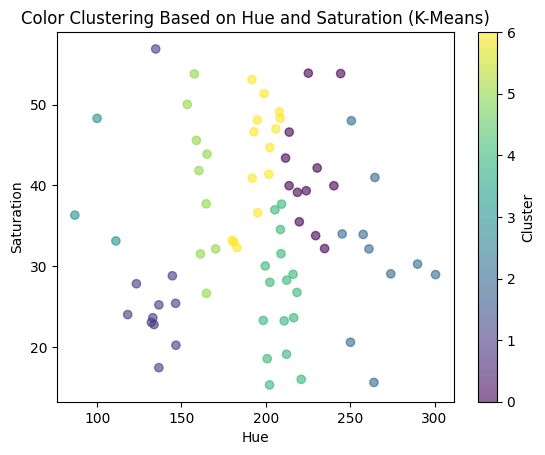

                       char_name         Hue  Saturation  Contrast Level  \
0         Izumi Miyamura (宮村 伊澄)  210.874632   23.225090        0.496040   
1             Kyouko Hori (堀 京子)  209.002201   31.539155        0.462881   
2  Rudeus Greyrat (ルーデウス・グレイラット)  216.146057   28.992538        0.444088   
3        Senkuu Ishigami (石神 千空)  208.656011   34.533039        0.503026   
4     Rimuru Tempest (リムル＝テンペスト)   86.754240   36.311926        0.534792   

   KMeans_Cluster  DBSCAN_Cluster  Agglomerative_Cluster  GMM_Cluster  
0               4               0                      6            4  
1               4               0                      3            0  
2               4               0                      6            4  
3               4               0                      3            4  
4               3               0                      2            3  


In [17]:
import pandas as pd
import ast
import colorsys
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load the dataset
file_path = "fixed_filtered_char_color.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Function to process colors
def process_colors(color_str):
    try:
        # Convert string to list of lists (RGB values)
        color_list = ast.literal_eval(color_str)
        
        hue_list = []
        sat_list = []
        luminance_list = []

        # Compute Hue, Saturation, and Luminance
        for color in color_list:
            r, g, b = [x / 255.0 for x in color]  # Normalize RGB
            h, s, v = colorsys.rgb_to_hsv(r, g, b)
            luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b  # Perceived brightness

            hue_list.append(h * 360)
            sat_list.append(s * 100)
            luminance_list.append(luminance)

        # Compute normalized contrast level
        max_lum, min_lum = max(luminance_list), min(luminance_list)
        contrast_levels = [(lum - min_lum) / (max_lum - min_lum) for lum in luminance_list]

        # Compute averages
        avg_hue = sum(hue_list) / len(hue_list) # round(sum(hue_list) / len(hue_list), 2)
        avg_saturation = sum(sat_list) / len(sat_list) # round(sum(sat_list) / len(sat_list), 2)
        avg_contrast_level = sum(contrast_levels) / len(contrast_levels) # round(sum(contrast_levels) / len(contrast_levels), 3)

        return avg_hue, avg_saturation, avg_contrast_level
    except:
        return None, None, None

# Apply the function to each row
df[["Hue", "Saturation", "Contrast Level"]] = df["colors"].apply(lambda x: pd.Series(process_colors(x)))

# Drop rows with missing values
df.dropna(subset=["Hue", "Saturation", "Contrast Level"], inplace=True)

# Clustering using different algorithms
df_cluster = df[["Hue", "Saturation", "Contrast Level"]]

# K-Means
num_clusters = 7  # You can change this based on the dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(df_cluster)

# DBSCAN
dbscan = DBSCAN(eps=30, min_samples=num_clusters)  # Adjust parameters based on dataset
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_cluster)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=num_clusters)
df["Agglomerative_Cluster"] = agglo.fit_predict(df_cluster)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(df_cluster)

# Save the processed dataset with clusters
# processed_file_path = "processed_color_dataset_with_clusters.csv"
# df.to_csv(processed_file_path, index=False)

# Plot the clusters (K-Means Example)
plt.scatter(df["Hue"], df["Saturation"], c=df["KMeans_Cluster"], cmap='viridis', alpha=0.6)
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Color Clustering Based on Hue and Saturation (K-Means)")
plt.colorbar(label="Cluster")
plt.show()

# Display sample output
print(df[["char_name", "Hue", "Saturation", "Contrast Level", "KMeans_Cluster", "DBSCAN_Cluster", "Agglomerative_Cluster", "GMM_Cluster"]].head())


########## 0 ##########


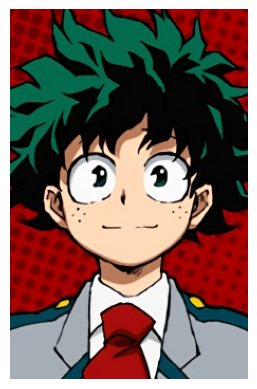

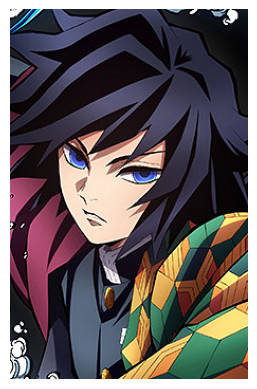

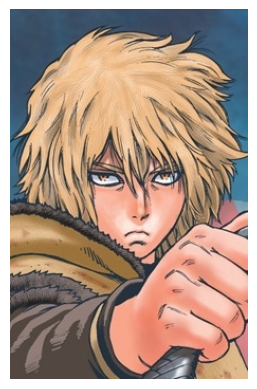

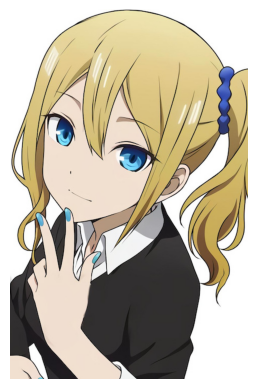

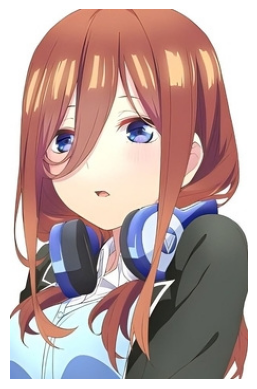

########## 1 ##########


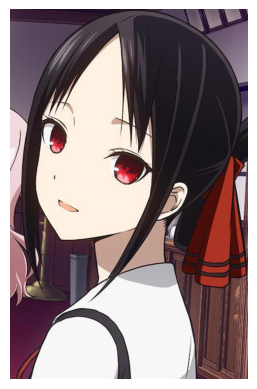

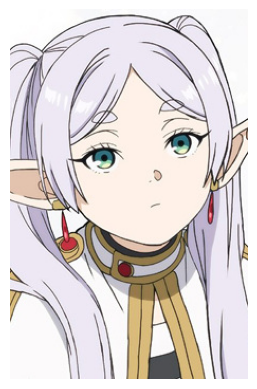

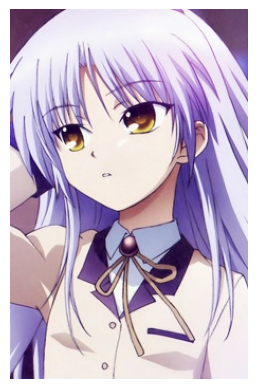

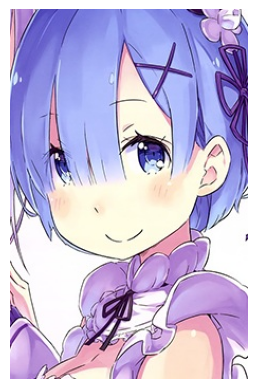

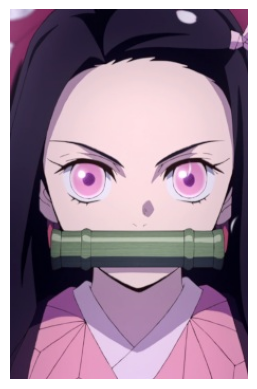

########## 2 ##########


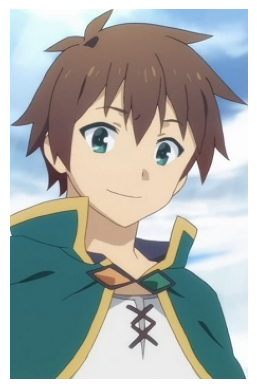

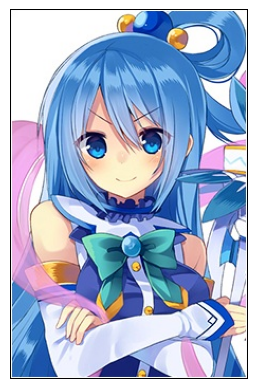

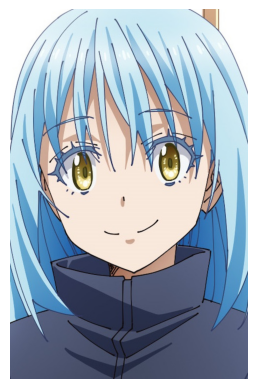

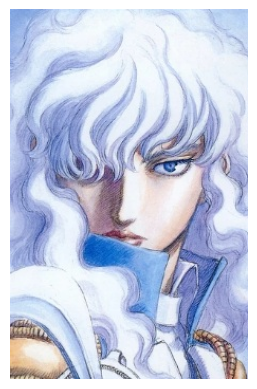

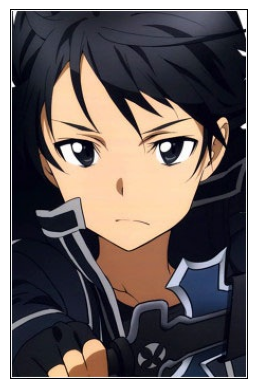

########## 3 ##########


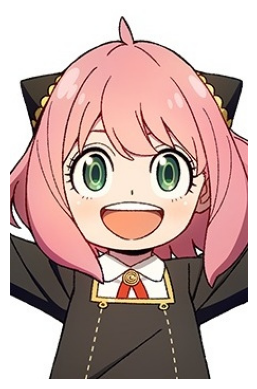

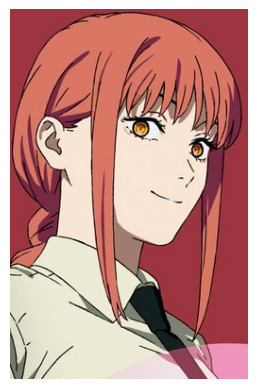

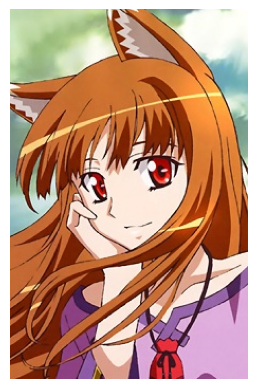

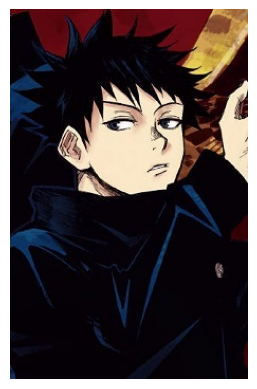

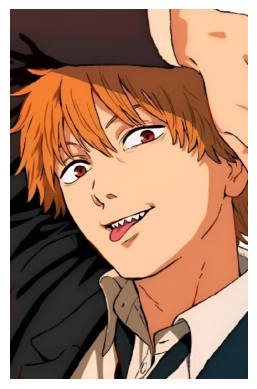

########## 4 ##########


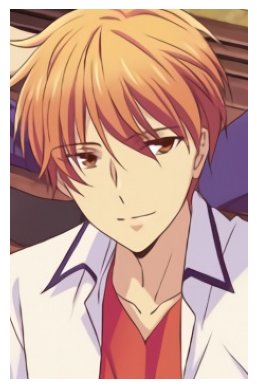

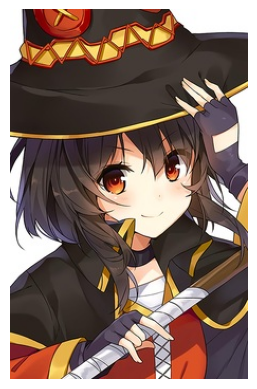

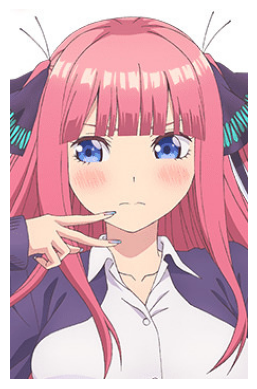

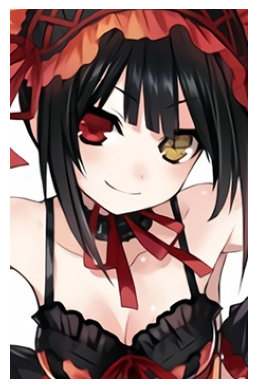

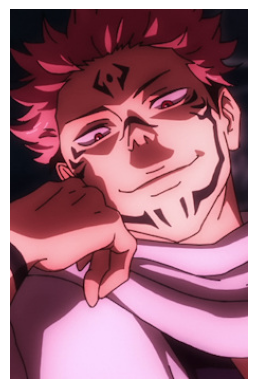

########## 5 ##########


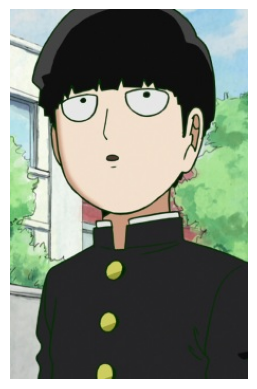

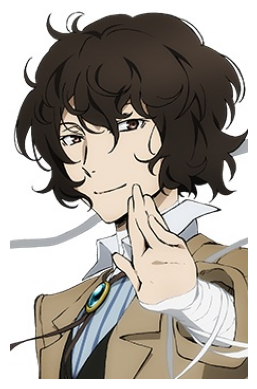

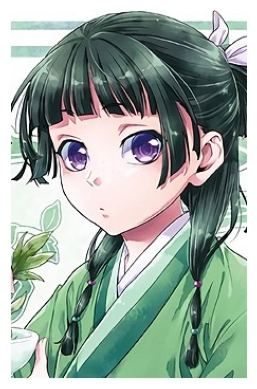

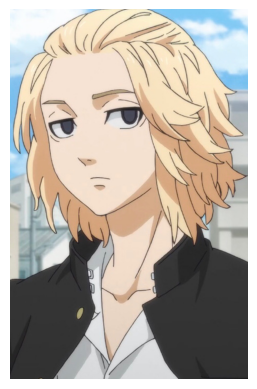

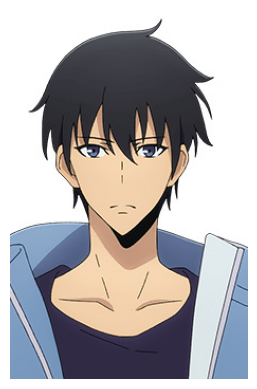

########## 6 ##########


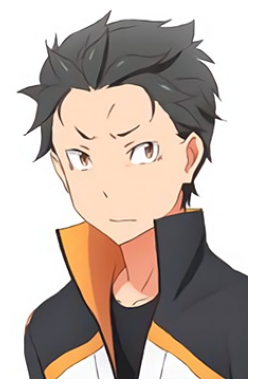

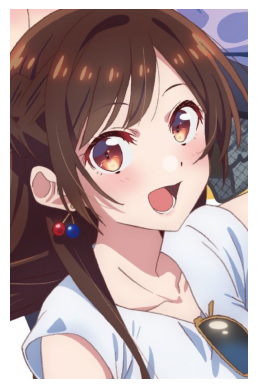

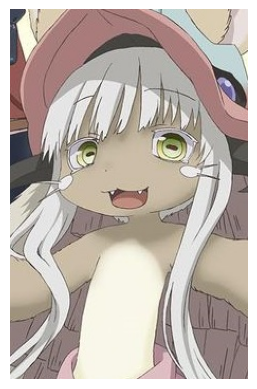

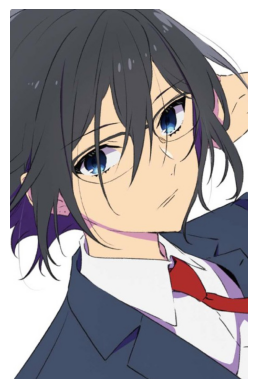

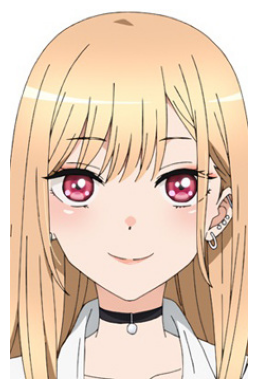

In [21]:
import pandas as pd
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# df = pd.read_csv("5_cluster_character.csv")
# cluster_type = "KMeans_Cluster"
cluster_type = "Agglomerative_Cluster"
# cluster_type = "GMM_Cluster"
# cluster_type = "DBSCAN_Cluster"
# URL of the image
for cluster in sorted(df[cluster_type].unique()):
    print("#"*10, cluster, "#"*10)
    vis_df = df.loc[df[cluster_type] == cluster].sample(5)
    for url in vis_df.img:
        # Fetch the image from the URL
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))

        # Display the image using matplotlib
        plt.imshow(img)
        plt.axis("off")  # Hide axes
        plt.show()